# Reproducible Statistics

## To create reproducible statistics, each step along the way is transparent and documented:
- Data wrangling
- Data sanitization
- Variable creation
- Transformations
- Variable coding
- Statistical tests
- Visualizations

# Most of these issues can be resolved by switching away from graphic interfaces and utilizing commmand-line based software.
- I'm not here to push coding, R, or Python
- There can be a high learning curve
- Comfort with coding shouldn't preclude Open Science

- You can use SPSS, just include the syntax
    - Create a new sytax file from the menus
    - Press 'paste' instead of 'ok' when you run your stats tests
    - Save syntax file in non-proprietary format

# R and Python are superior resources
- Extensive online communities
- Large number of extensions and libraries
- Free resources
- Large amount of content geared to help beginners

# Example - Pearson Correlation

## Step 1 - Simulate Data

In [1]:
import numpy as np


## Let's pretend that on average we pick 25 apples
## Let's pretend that on average it's 20 degrees outside
mean = [25, 20]  
cov = [[1, 0.6], [0.6, 1]] # specify the correlation strenth in matrix

## Let's pick a sample size of 100
num_samples = 10000

## Simulate the data
apples, temperature = np.random.multivariate_normal(mean, cov, size=num_samples).T

## Plot Data

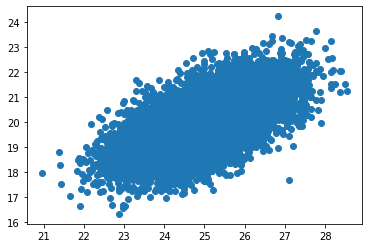

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
## Plot the data to see if it looks right
plt.plot(apples, temperature,'o')
plt.show()

## Step 3 - Run Correlation

In [3]:
from scipy.stats import pearsonr

r, p = pearsonr(apples, temperature)
print("r =", round(r,3), "\np =", round(p, 3))

r = 0.607 
p = 0.0


# Prepare to send data to R

In [4]:
import pandas as pd
## Create pandas worksheet
df = pd.DataFrame()
df['apples'] = apples
df['temperature'] = temperature
df.head(5)

,apples,temperature
0,25.198902,20.434749
1,26.140066,20.780607
2,24.999711,19.887354
3,26.826734,21.257581
4,26.261865,19.293115


## Switch to R

In [5]:
import rpy2.rinterface
%load_ext rpy2.ipython


In [6]:
%%R -i df
apples <- unlist(df['apples'])
temperature <-unlist(df['temperature'])

/home/david/anaconda3/envs/open-science/lib/python3.7/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


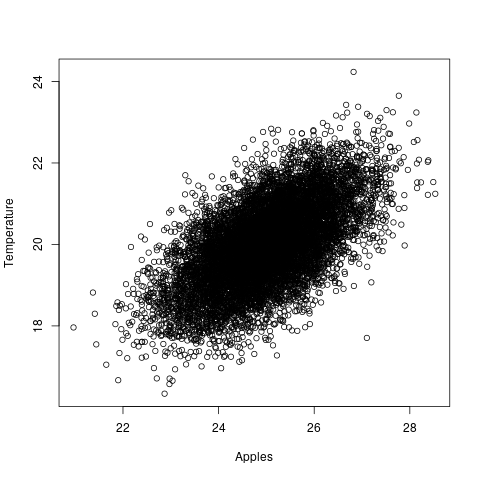

In [7]:
%%R
plot(apples, temperature, xlab="Apples", ylab="Temperature") 


In [8]:
%%R
cor.test(apples, temperature)



	Pearson's product-moment correlation

data:  apples and temperature
t = 76.355, df = 9998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.5943794 0.6191441
sample estimates:
     cor 
0.606909 



# Reproducible statistics tools in R

### Reproducability environments
- R-Studio Notebooks
    -https://rmarkdown.rstudio.com/lesson-10.html
- Jupyter Notebooks
    - https://jupyter.org/hub

### Usefull R Packages
- Simulate structured datasets for preregistration
    - https://debruine.github.io/faux/
- Automatically generate codebooks and metadata
    - https://rubenarslan.github.io/codebook/articles/codebook.html
- Generate reproducible manuscripts with bookdown
    - https://bookdown.org/yihui/bookdown/
    

# Don't be afraid that your code isn't good enough to share

- Getting the information out there is the important part
- If there are any errors, better they are fixed than hidden
- You can learn how to code better from people fixing your code
- If the code works, who cares if it's not elegant
